In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
def fix_ags5(x):
    if len(str(x))==4:
        return '0'+str(x)
    else:
        return str(x)

In [3]:
def plot_map(data, merge_col, data_col, cat_col=False):
    # read the map coordinates data 
    gdf = gpd.read_file('georef-germany-kreis/georef-germany-kreis-millesime.shp')
    
    # merge the coords with the data 
    try:
        merged = pd.merge(data, gdf, left_on=merge_col, right_on='krs_code')
    except ValueError:
        data['ags5_fix'] = data['ags5'].apply(fix_ags5)
        merged = pd.merge(data, gdf, left_on='ags5_fix', right_on='krs_code')
    
    # get the geospatial data 
    merged['coords'] = merged['geometry'].apply(lambda x: x.representative_point().coords[:])
    merged['coords'] = [coords[0] for coords in merged['coords']]
    merged['longitude'] = merged['coords'].str[0]
    merged['latitude'] = merged['coords'].str[1]
    
    # convert to geodata
    merged = gpd.GeoDataFrame(merged)
    
    # plot
    # (1) categorical data_col
    if cat_col == True:
        fig, ax = plt.subplots(figsize=(25,15))
        merged.plot(column=data_col, #scheme="NaturalBreaks",
                    #scheme='UserDefined', classification_kwds={'bins':clusters},
                    ax=ax, cmap='Set1', categorical=True, legend=False)
#         ax.set_title(f'{data_col} in Germany by County', fontsize=15)
    
#     return fig

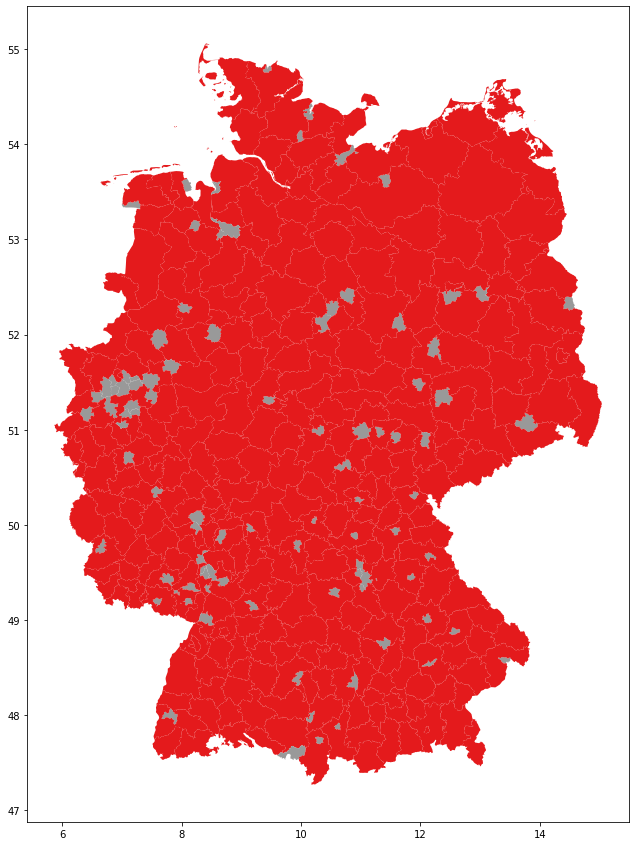

In [8]:
cluster = 'cluster3'
cluster_col = 'fake'

data = pd.read_csv(f'data/{cluster}.csv', encoding='latin_1')
index = pd.read_csv('data/index.csv')
data = pd.merge(data, index, on='ags5')

data['ags5_fix'] = data['ags5'].apply(fix_ags5)
plot_map(data, 'ags5_fix', cluster_col, cat_col=True)
plt.savefig(f'img/{cluster}.png')